In [124]:
import numpy as np
import pandas as pd
import sklearn as sklearn
import matplotlib.pyplot as plt
import seaborn as sns


# 1.  Importing the dataset

In [125]:
#The dataset was changed to an excel document with MS EXCEL

df = pd.read_excel('MFR DATA.xlsx')

In [126]:
#Let's change the columns from codes to names

df.rename(columns = {'Unnamed: 0':'Time','513FC31103.pv':'Propylene flow',
                     '513HC31114-5.mv':'Hydrogen ratio',
                    '513PC31201.pv':'Pressure controller',
                    '513LC31202.pv':'Level controller',
                    '513FC31409.pv':'Liquefied Recycle gas to R-310 dome top',
                    '513FC31114-5.pv':'Hydrogen Flow',
                    '513TC31220.pv':'Temperature controller',
                    }, inplace = True)

In [127]:
len(df)

2564

In [128]:
df.shape

(2564, 9)

So, there are overall 2564 rows and 8 independent and 1 dependent columns. 
Let's check for null values.

In [129]:
df.isna().sum()

Time                                        0
Propylene flow                             78
Hydrogen ratio                              4
Pressure controller                        80
Level controller                           80
Liquefied Recycle gas to R-310 dome top    80
Hydrogen Flow                              78
Temperature controller                     80
MFR                                         0
dtype: int64

So at max in each column there are only 80 values that are empty out of total 2564 values. 
We still have got 2484 values that are going to be enough if we drop null values. 


In [130]:
df.head(10)

,Time,Propylene flow,Hydrogen ratio,Pressure controller,Level controller,Liquefied Recycle gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
0,2018-05-04 19:45:00,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,2018-05-04 21:45:00,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,2018-05-04 23:45:00,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,2018-06-04 01:45:00,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,2018-06-04 03:45:00,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3
5,2018-06-04 05:45:00,25362.809,0.150,30.438940,78.293411,32548.566,0.140550,79.061462,3.2
6,2018-06-04 07:45:00,25642.936,0.150,30.419355,78.568573,42557.902,0.166875,79.565430,3.4
7,2018-06-04 09:45:00,27009.320,0.150,30.504484,78.852005,45878.480,0.160510,79.390396,3.6
8,2018-06-04 11:45:00,27971.072,0.150,NaN,NaN,NaN,0.150164,NaN,3.7
9,2018-06-04 13:45:00,27307.461,0.150,30.204451,78.931427,49528.848,0.159013,78.511749,3.8


In [131]:
df = df.dropna()

In [132]:
df

,Time,Propylene flow,Hydrogen ratio,Pressure controller,Level controller,Liquefied Recycle gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
0,2018-05-04 19:45:00,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,2018-05-04 21:45:00,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,2018-05-04 23:45:00,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,2018-06-04 01:45:00,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,2018-06-04 03:45:00,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3
5,2018-06-04 05:45:00,25362.809,0.150,30.438940,78.293411,32548.566,0.140550,79.061462,3.2
6,2018-06-04 07:45:00,25642.936,0.150,30.419355,78.568573,42557.902,0.166875,79.565430,3.4
7,2018-06-04 09:45:00,27009.320,0.150,30.504484,78.852005,45878.480,0.160510,79.390396,3.6
9,2018-06-04 13:45:00,27307.461,0.150,30.204451,78.931427,49528.848,0.159013,78.511749,3.8
10,2018-06-04 15:45:00,26623.619,0.150,30.201500,78.574249,43206.711,0.141628,78.461151,3.8


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2484 entries, 0 to 2559
Data columns (total 9 columns):
Time                                       2484 non-null object
Propylene flow                             2484 non-null float64
Hydrogen ratio                             2484 non-null float64
Pressure controller                        2484 non-null float64
Level controller                           2484 non-null float64
Liquefied Recycle gas to R-310 dome top    2484 non-null float64
Hydrogen Flow                              2484 non-null float64
Temperature controller                     2484 non-null float64
MFR                                        2484 non-null float64
dtypes: float64(8), object(1)
memory usage: 194.1+ KB


# 2. Basic multi-variable analysis

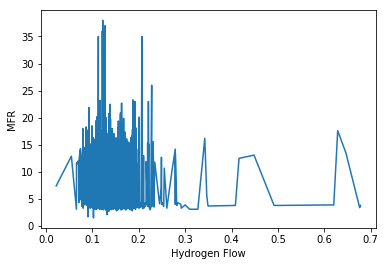

In [134]:

sns.lineplot(x='Hydrogen Flow', y="MFR", data = df)

Most of the Hydrogen Flow lies between 0.9 to 2.3. It could be an indicator that this is the ideal hydrogen flow required for a good MFR as MFR is good here. 
Also a point to note that values above 2 are highly rare here so let's not bring them to much consideration. 

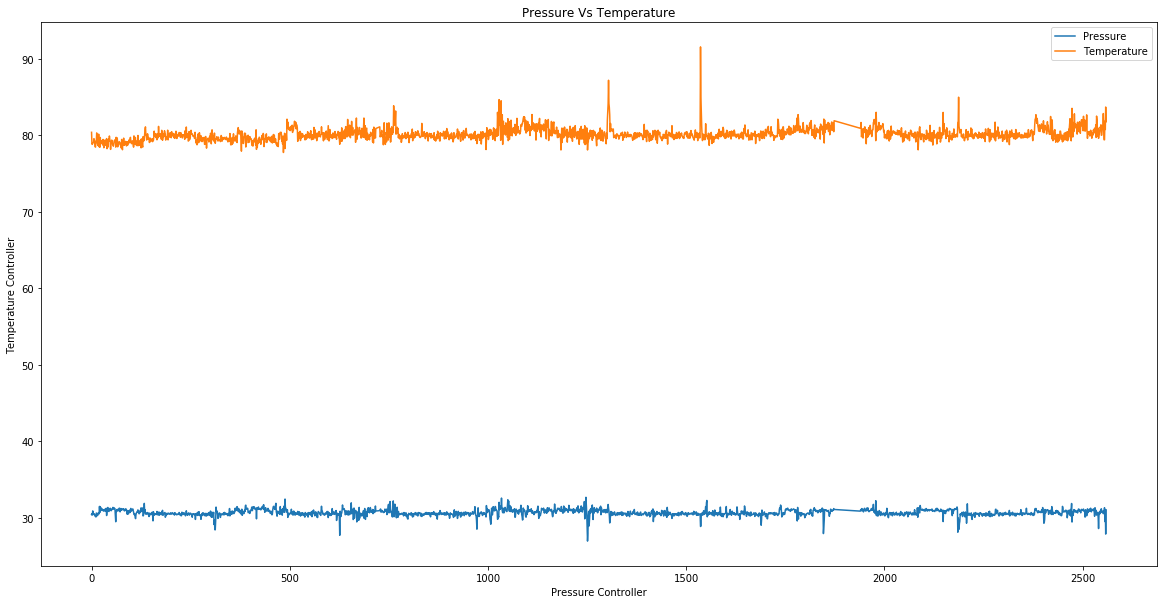

In [135]:
%matplotlib inline
plt.figure(figsize=(20,10))

# First subplot
#plt.subplot(1, 2, 1)
plt.title('Pressure Vs Temperature')
plt.plot( df['Pressure controller'], label='Pressure')
plt.plot( df['Temperature controller'], label='Temperature')
plt.xlabel('Pressure Controller')
plt.ylabel('Temperature Controller')
plt.legend(loc='best')


Pressure and temperature move along consistently. That is under restrictions. 

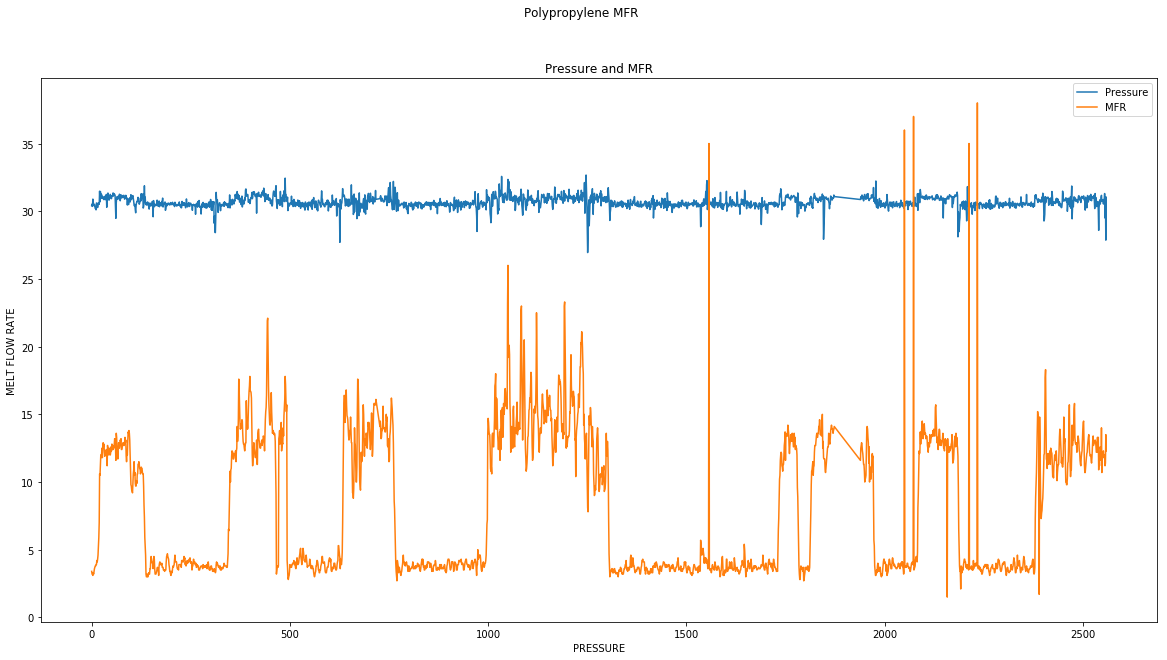

In [136]:
plt.figure(figsize=(20,10))

plt.title('Pressure and MFR')
plt.plot( df['Pressure controller'], label='Pressure')
plt.plot( df['MFR'], label='MFR')
plt.xlabel('PRESSURE')
plt.ylabel('MELT FLOW RATE')
plt.legend(loc='best')

plt.suptitle('Polypropylene MFR')
plt.show()

Pressure alone has no significant effect on 

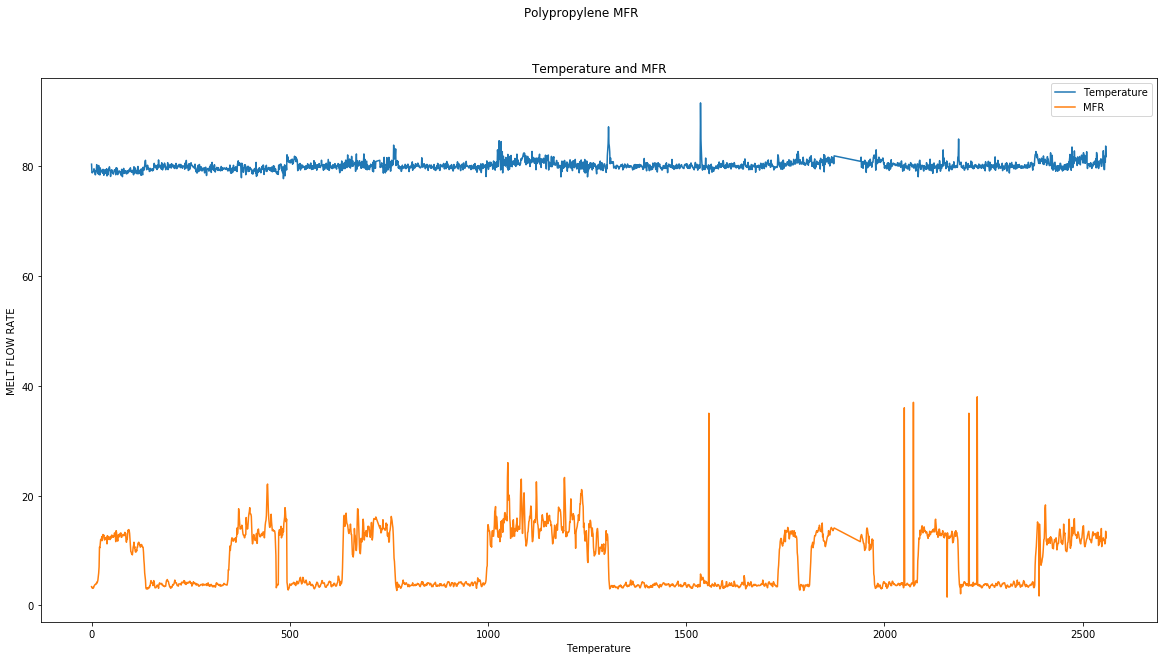

In [137]:
plt.figure(figsize=(20,10))

plt.title('Temperature and MFR')
plt.plot( df['Temperature controller'], label='Temperature')
plt.plot( df['MFR'], label='MFR')
plt.xlabel('Temperature')
plt.ylabel('MELT FLOW RATE')
plt.legend(loc='best')

plt.suptitle('Polypropylene MFR')
plt.show()

The pressure alone has no effect on MRF. 
It is important to know know that none of the columns are correlated and neither of them have direct effects on MFR. 
It proves that Polymer is a joint result of all the factors like hydrogen, propylene etc where everything is equally important. 


# Anamolies Detection

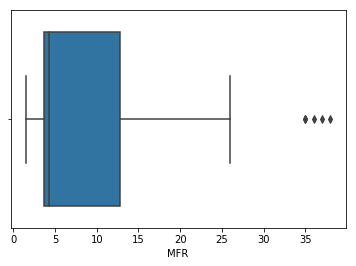

In [138]:
#Making a boxplot to see if any anamolies exist
sns.boxplot(x= 'MFR', data = df)

There are anamolies in the dataset but we ought not to remove them as different MFR can be used for different products.
MFR is inversly proportional to viscosity meaning high MFR products are more durable and hence such plastics can be used for making lunchboxes etc. However low one can be used for making bottles etc. 

In [139]:
corr = df.corr()
corr

,Propylene flow,Hydrogen ratio,Pressure controller,Level controller,Liquefied Recycle gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
Propylene flow,1.000000,-0.035833,-0.246382,0.207590,0.387429,0.279968,-0.157591,-0.247984
Hydrogen ratio,-0.035833,1.000000,0.221576,0.104436,0.375745,0.226919,0.052967,0.426433
Pressure controller,-0.246382,0.221576,1.000000,0.044294,0.064547,-0.152372,-0.036286,0.438837
Level controller,0.207590,0.104436,0.044294,1.000000,0.289986,0.000157,-0.084688,-0.006452
Liquefied Recycle gas to R-310 dome top,0.387429,0.375745,0.064547,0.289986,1.000000,0.246106,0.116090,0.233219
Hydrogen Flow,0.279968,0.226919,-0.152372,0.000157,0.246106,1.000000,0.103214,-0.209013
Temperature controller,-0.157591,0.052967,-0.036286,-0.084688,0.116090,0.103214,1.000000,0.125628
MFR,-0.247984,0.426433,0.438837,-0.006452,0.233219,-0.209013,0.125628,1.000000


Well, the correlations are highly unlikely so we don't need to remove any dimensions.

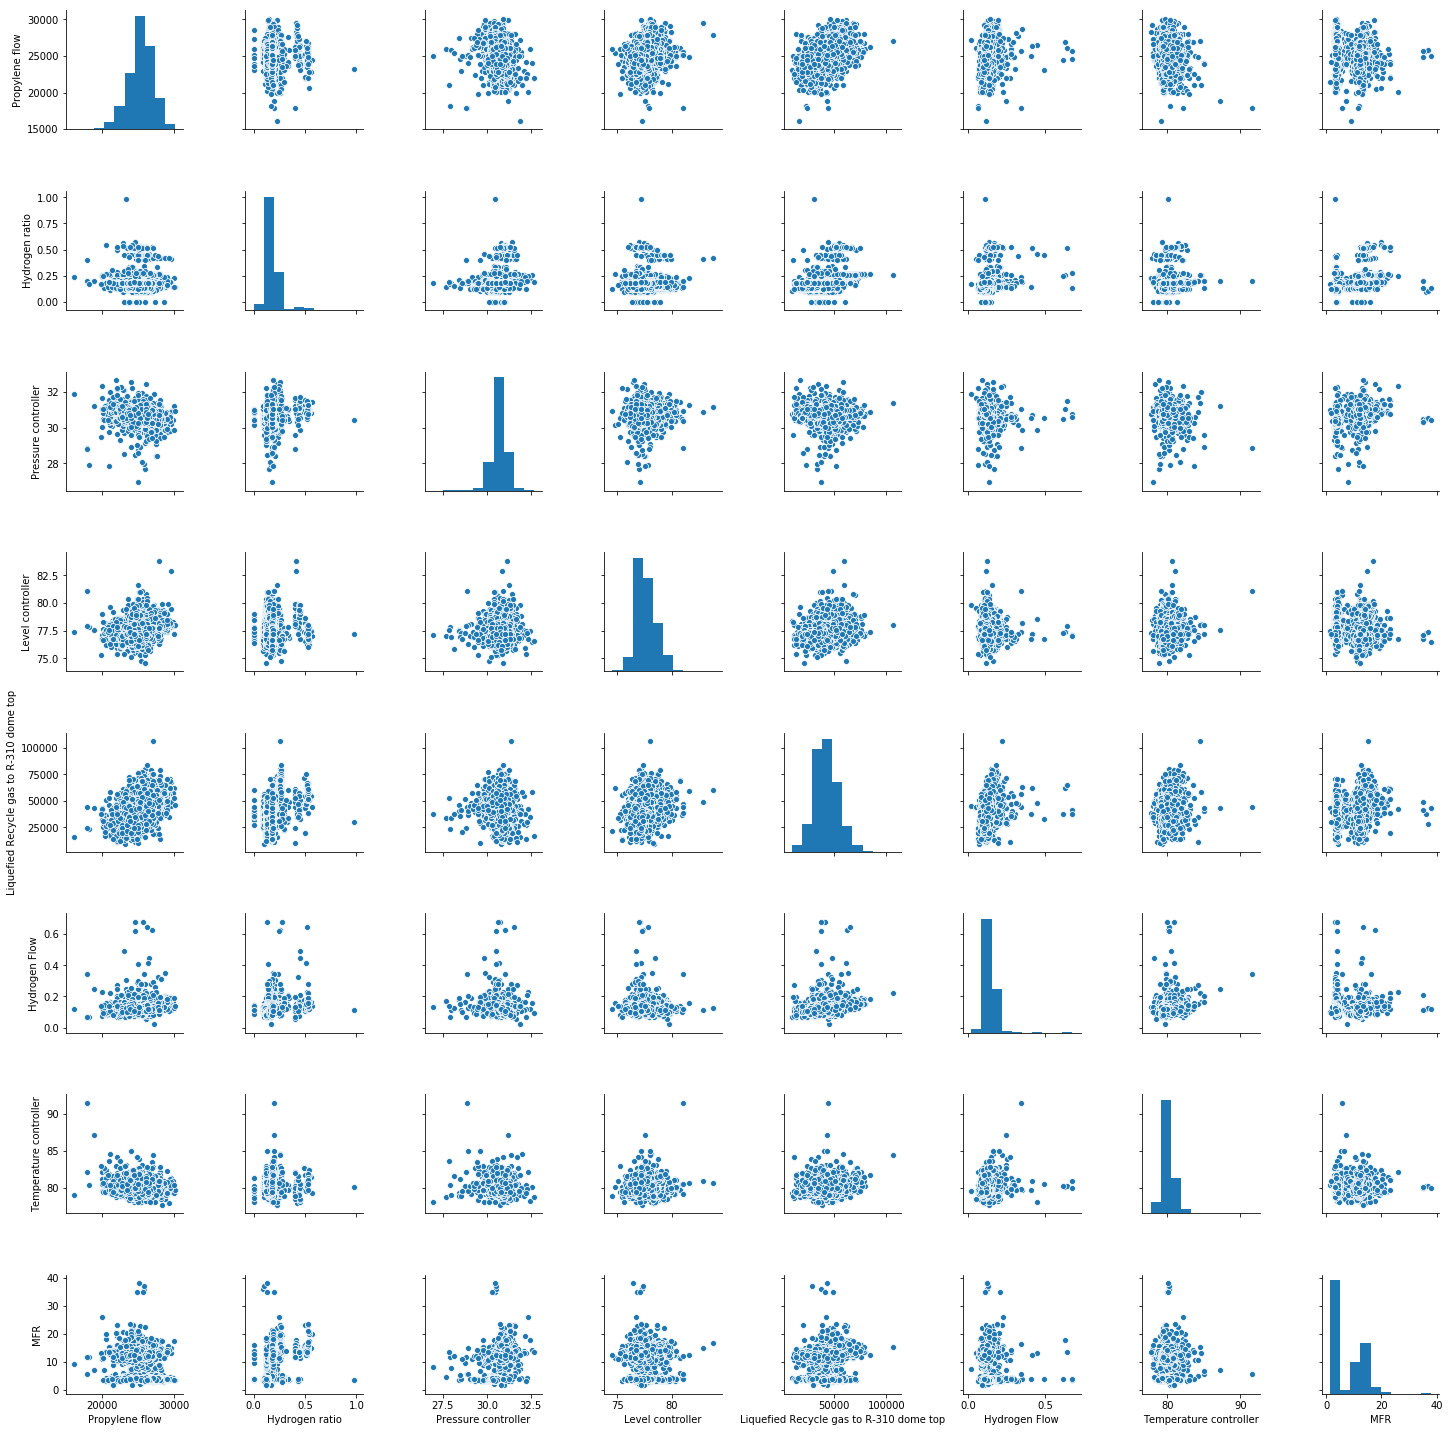

In [149]:
# Let's make a pair plot
sns.pairplot(data=df)

Well, there does not seem any specific relationship between any of the variables. 

In [140]:
del df['Time'] 
#This might have caused problem in further steps of IQR

# 3. Scaling

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
X = df.iloc[:,1:7]
y = df.loc[:,'MFR'].values


In [152]:
sc = StandardScaler()
X = sc.fit_transform(X)


In [153]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

In [154]:
 # Importing RandomForestClassifier from sklearn.ensemble
    
from sklearn.ensemble import RandomForestRegressor
Regressor = RandomForestRegressor(n_estimators = 200, min_samples_split=2)
Regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [155]:
# Predictions can be made based upon this classifier

y_pred = Regressor.predict(X_test)
# the answer contains values between 0 to one. 
y_pred


array([ 3.7515, 13.6845,  4.015 , 14.4995, 15.293 ,  8.3305, 11.953 ,
        4.523 , 17.457 ,  4.2215, 11.2625,  3.682 ,  9.232 ,  4.116 ,
        6.3675, 13.392 ,  4.1605, 10.4705, 12.358 , 14.15  , 11.8585,
       12.5415, 10.624 ,  3.8945,  3.702 ,  6.613 ,  3.8195,  4.5655,
       14.209 , 12.5475, 11.087 ,  3.625 ,  4.326 ,  4.114 ,  3.533 ,
       10.3125,  3.635 , 12.5755,  9.6515,  5.308 , 12.4505,  3.892 ,
        8.745 ,  4.063 ,  4.087 , 15.989 , 11.454 ,  4.921 , 13.247 ,
        3.8145,  3.9845, 15.386 ,  3.7925,  4.094 ,  7.1125, 12.8795,
        3.898 , 13.807 , 13.39  ,  8.7295, 11.0175,  9.813 ,  9.86  ,
        5.106 ,  3.8615,  5.641 ,  6.4695, 12.3465, 12.661 ,  6.289 ,
        3.7115, 13.4405, 13.064 ,  3.6415,  3.684 ,  4.0385,  8.3295,
        7.7115, 12.4305,  6.398 ,  9.26  ,  4.1135, 10.89  ,  4.1485,
       15.169 ,  6.957 ,  3.7635, 12.213 , 14.2725,  4.661 , 10.2045,
       14.567 ,  8.896 , 12.6125, 16.5385, 16.21  ,  3.928 ,  9.162 ,
       13.6365,  3.9

In [156]:
#Checking for accuracy

from sklearn.metrics import  r2_score


r2 = r2_score(y_test, y_pred)




print("The Accuracy is: {}%".format(r2*100))



The Accuracy is: 74.52039632488714%


The accuracy is quite good. The model does not show overfitting on the basis of accuracy and nor is it underfit. This marks the conclusion. 